# Expectation Based Scan Statistic on Ealing

In [10]:
from SpatialScan.region import *
from SpatialScan.likelihood import *
from SpatialScan.results import *
from SpatialScan.scan import *
#from SpatialScan.timeseries import *

import pandas as pd

## Time Series Analysis

Output from TSA. For convenience, we just import a csv file with processing already complete. Roughly 30 mins work.

In [11]:
forecast_df = pd.read_csv("../data/test_2.csv")
forecast_df.drop(["Unnamed: 0", "C/B"], axis=1, inplace=True)
forecast_df

detector_id       lon        lat measurement_start_utc  \
0       N28/156p1 -0.247930  51.534337   2020-06-04 00:00:00   
1       N28/156p1 -0.247930  51.534337   2020-06-04 01:00:00   
2       N28/156p1 -0.247930  51.534337   2020-06-04 02:00:00   
3       N28/156p1 -0.247930  51.534337   2020-06-04 03:00:00   
4       N28/156p1 -0.247930  51.534337   2020-06-04 04:00:00   
...           ...       ...        ...                   ...   
73867   N01/011f1 -0.156751  51.502273   2020-06-04 19:00:00   
73868   N01/011f1 -0.156751  51.502273   2020-06-04 20:00:00   
73869   N01/011f1 -0.156751  51.502273   2020-06-04 21:00:00   
73870   N01/011f1 -0.156751  51.502273   2020-06-04 22:00:00   
73871   N01/011f1 -0.156751  51.502273   2020-06-04 23:00:00   

       measurement_end_utc   baseline  count  hour_from_start  
0      2020-06-04 01:00:00  51.695800   60.0              0.0  
1      2020-06-04 02:00:00  50.175350   32.0              1.0  
2      2020-06-04 03:00:00  25.545471   19.0              2.0  
3      2020-06-04 04:00:00  49.099617   46.0              3.0  
4      2020-06-04 05:00:00  86.717270   72.0              4.0  
...                    ...        ...    ...              ...  
73867  2020-06-04 20:00:00        NaN    NaN             19.0  
73868  2020-06-04 21:00:00        NaN    NaN             20.0  
73869  2020-06-04 22:00:00        NaN    NaN             21.0  
73870  2020-06-04 23:00:00        NaN    NaN             22.0  
73871  2020-06-05 00:00:00        NaN    NaN             23.0  

[73872 rows x 8 columns]

## The Scan

Data Checks as a first step - baselines non-negative and dates to datetime. NaN's also removed here.

In [12]:
forecast_df = cleanse_forecast_data(forecast_df)

Dates are not in datetime format. Attempting to convert...
Dates converted successfully: True.

7503 NaN values found in 'count' column. Dropping these from the dataframe.
8760 NaN values found in 'baseline' column. Dropping these from the dataframe.

677 negative baseline values found. Setting these to zero.

Data cleansing complete. 10362 rows removed from dataframe.


In [13]:
num_detectors = len(set(forecast_df["detector_id"]))
print("{} detectors in search region.".format(num_detectors))

2665 detectors in search region.


In [4]:
forecast_df

detector_id       lon        lat measurement_start_utc  \
0       N28/156p1 -0.247930  51.534337   2020-06-04 00:00:00   
1       N28/156p1 -0.247930  51.534337   2020-06-04 01:00:00   
2       N28/156p1 -0.247930  51.534337   2020-06-04 02:00:00   
3       N28/156p1 -0.247930  51.534337   2020-06-04 03:00:00   
4       N28/156p1 -0.247930  51.534337   2020-06-04 04:00:00   
...           ...       ...        ...                   ...   
65107   N01/146j1 -0.150502  51.523043   2020-06-04 19:00:00   
65108   N01/146j1 -0.150502  51.523043   2020-06-04 20:00:00   
65109   N01/146j1 -0.150502  51.523043   2020-06-04 21:00:00   
65110   N01/146j1 -0.150502  51.523043   2020-06-04 22:00:00   
65111   N01/146j1 -0.150502  51.523043   2020-06-04 23:00:00   

      measurement_end_utc   baseline  count  hour_from_start  
0     2020-06-04 01:00:00  51.695800   60.0              0.0  
1     2020-06-04 02:00:00  50.175350   32.0              1.0  
2     2020-06-04 03:00:00  25.545471   19.0              2.0  
3     2020-06-04 04:00:00  49.099617   46.0              3.0  
4     2020-06-04 05:00:00  86.717270   72.0              4.0  
...                   ...        ...    ...              ...  
65107 2020-06-04 20:00:00  47.433002   59.0             19.0  
65108 2020-06-04 21:00:00  16.213072   25.0             20.0  
65109 2020-06-04 22:00:00  11.669567   19.0             21.0  
65110 2020-06-04 23:00:00   9.119369   18.0             22.0  
65111 2020-06-05 00:00:00   2.185849   12.0             23.0  

[63510 rows x 8 columns]

To get a better idea of what this global space-time region looks like, we can call a number of helper functions.

### `infer_global_region()`

In [14]:
print(infer_global_region(forecast_df))

(-0.349749335498348, -0.150003068372602) x (51.350656217783296, 51.5498604495617) x (2020-06-04 00:00:00, 2020-06-05 00:00:00)


### `CB_plot()`

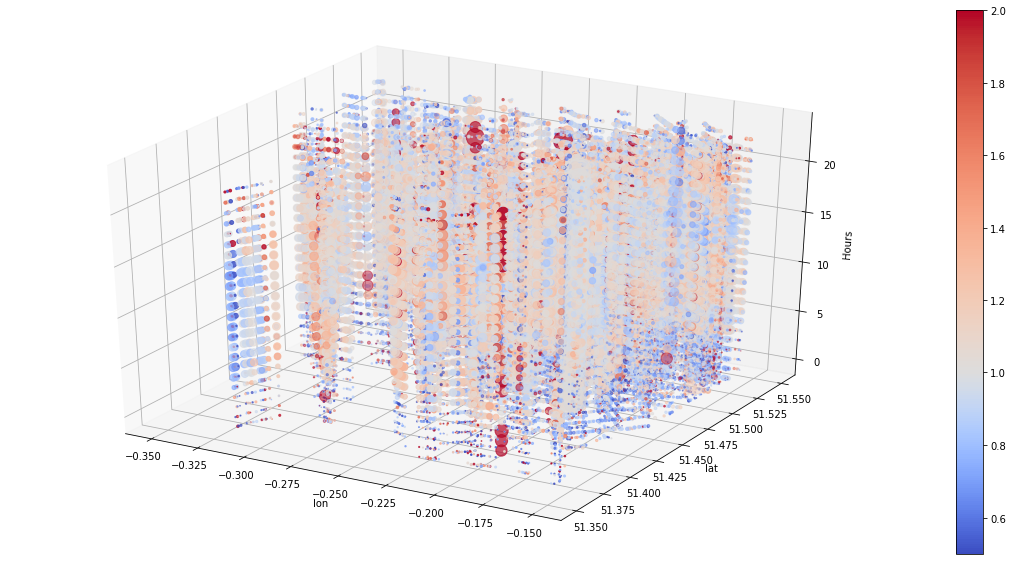

In [6]:
CB_plot(forecast_df)

### `plot_global_region()`

First choose a date to look at activity.

In [15]:
test_date = forecast_df["measurement_end_utc"].iloc[0]

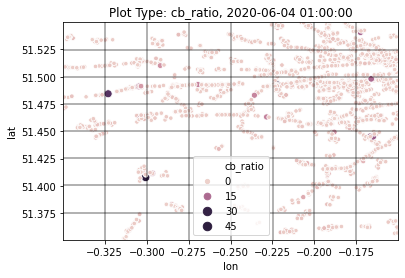

In [16]:
plot_global_region(forecast_df, test_date, overlay_grid=True, grid_partition=8, plot_type='cb_ratio', add_legend=True)

Then, we can run the model ...

### `EBP()`

In [9]:
res_df = EBP(forecast_df, 8)

100.00% complete.
16224 space-time regions searched in 61.38 seconds


In [10]:
res_df

x_min     x_max      y_min      y_max      t_min  \
7005  -0.299813 -0.199940  51.375557  51.425358 2020-06-04   
6981  -0.299813 -0.199940  51.375557  51.400457 2020-06-04   
7006  -0.299813 -0.199940  51.375557  51.425358 2020-06-04   
7007  -0.299813 -0.199940  51.375557  51.425358 2020-06-04   
6982  -0.299813 -0.199940  51.375557  51.400457 2020-06-04   
...         ...       ...        ...        ...        ...   
13081 -0.224908 -0.199940  51.524960  51.549860 2020-06-04   
13082 -0.224908 -0.199940  51.524960  51.549860 2020-06-04   
13083 -0.224908 -0.199940  51.524960  51.549860 2020-06-04   
13084 -0.224908 -0.199940  51.524960  51.549860 2020-06-04   
0     -0.349749 -0.324781  51.350656  51.375557 2020-06-04   

                    t_max         B         C  likelihood_score  p_value  
7005  2020-06-04 22:00:00  0.781541  0.879439          1.005908      NaN  
6981  2020-06-04 22:00:00  0.544386  0.626282          1.005890      NaN  
7006  2020-06-04 23:00:00  0.792284  0.890500          1.005868      NaN  
7007  2020-06-05 00:00:00  0.799240  0.897797          1.005858      NaN  
6982  2020-06-04 23:00:00  0.551522  0.633604          1.005843      NaN  
...                   ...       ...       ...               ...      ...  
13081 2020-06-04 02:00:00  0.005630  0.005228          1.000000      NaN  
13082 2020-06-04 03:00:00  0.007654  0.007037          1.000000      NaN  
13083 2020-06-04 04:00:00  0.009689  0.008829          1.000000      NaN  
13084 2020-06-04 05:00:00  0.013089  0.011819          1.000000      NaN  
0     2020-06-04 01:00:00  0.000000  0.000000          1.000000      NaN  

[16224 rows x 10 columns]

Once we have `res_df`, we can do many things...

### `plot_region_by_rank()` - See which regions of space are getting the highest F(S) scores

Switch between `plot_types`

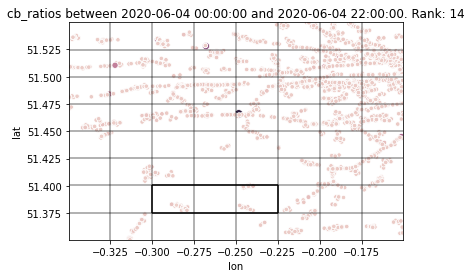

In [11]:
plot_region_by_rank(14, res_df, forecast_df, plot_type='cb_ratio', add_legend=False)

Now suppose I was interested in this highest ranked region and want to look at its time series... Switch the plot type between "count", "baseline" and "cb_ratio".

In [12]:
# First create a region object
region = make_region_from_res(res_df, rank=0, whole_prediction_period=True)

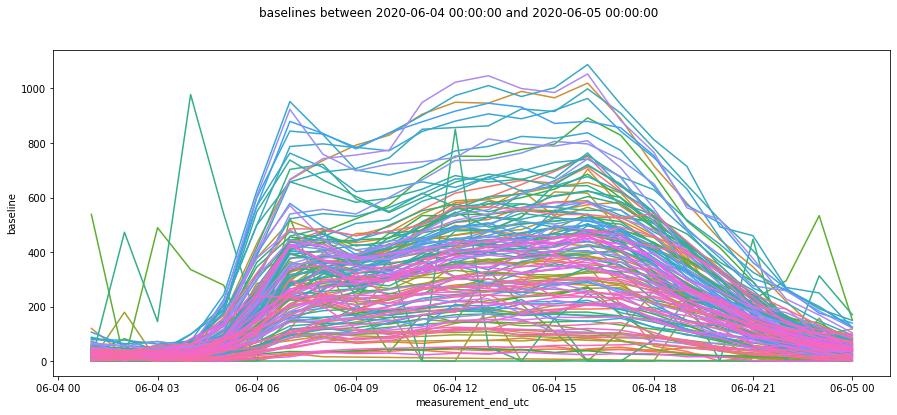

In [13]:
plot_region_time_series(region, forecast_df, plot_type="baseline", add_legend=False)

This highest scoring region contains ~20 detectors  - this is what they do over the whole period.

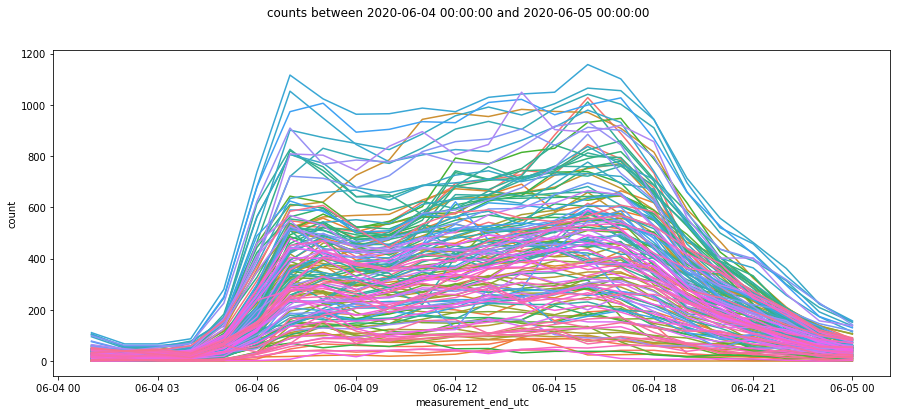

In [14]:
plot_region_time_series(region, forecast_df, plot_type="count", add_legend=False)

#### Average Likelihood Visualisation

For each of our `grid_partition` x `grid_parition` cells, we can calculate it's average likelihood accumulated form the overlapping search rectangles. 

In [15]:
# First call this function to get all plot information
scores, x, y, t, av_l_max = average_likelihood(res_df)

Now, we can plot using `visualise_results()`

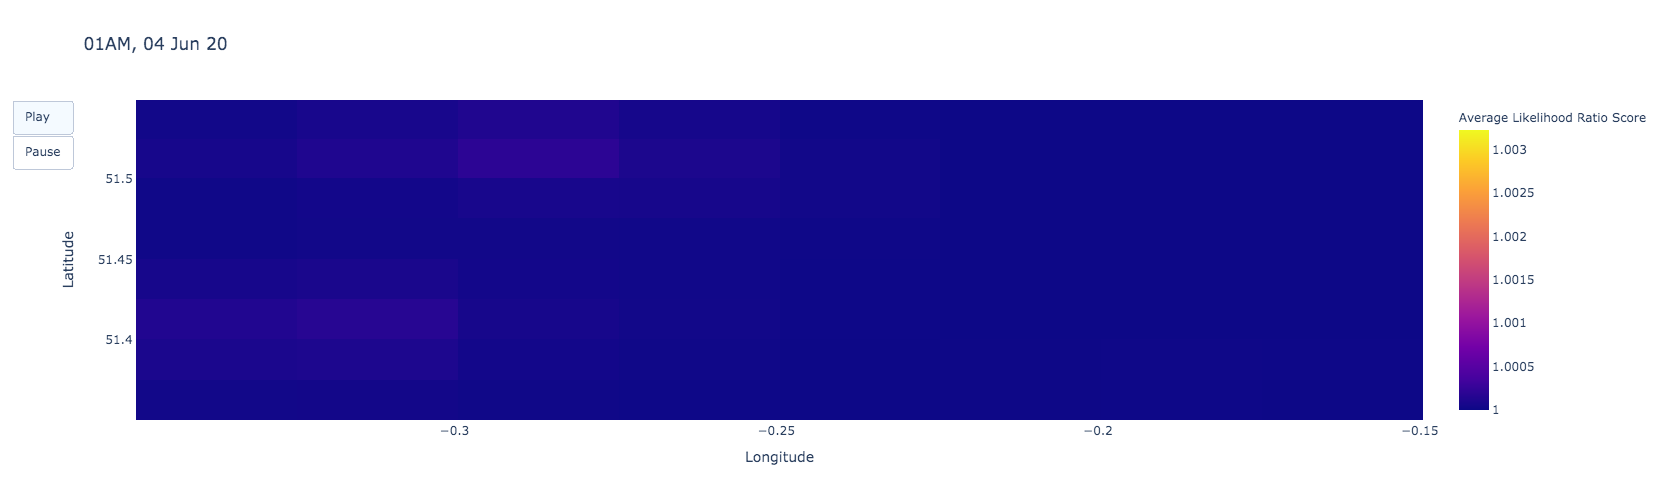

In [16]:
visualise_results(scores, x, y, t, av_l_max, smooth=False)

## Randomisation Testing

Now we have the result, how significant are they?

`randomisation_test()`

In [17]:
sig_df, f_scores = randomisation_test(forecast_df, res_df, n_sims=5)

Found a grid partition = 8
Searching over the region spanning 24 hours

Beginning Simulation
Performing simulation 5 of 5.
Time Elapsed: 867.489024811 seconds


Let's see how our scores from `res_df` compare with randomly generated ones. The `sig_df` dataframe has now populated the `p_value` columns of `res_df`.

In [18]:
sig_df

x_min     x_max      y_min      y_max      t_min  \
7005  -0.299813 -0.199940  51.375557  51.425358 2020-06-04   
6981  -0.299813 -0.199940  51.375557  51.400457 2020-06-04   
7006  -0.299813 -0.199940  51.375557  51.425358 2020-06-04   
7007  -0.299813 -0.199940  51.375557  51.425358 2020-06-04   
6982  -0.299813 -0.199940  51.375557  51.400457 2020-06-04   
...         ...       ...        ...        ...        ...   
13081 -0.224908 -0.199940  51.524960  51.549860 2020-06-04   
13082 -0.224908 -0.199940  51.524960  51.549860 2020-06-04   
13083 -0.224908 -0.199940  51.524960  51.549860 2020-06-04   
13084 -0.224908 -0.199940  51.524960  51.549860 2020-06-04   
0     -0.349749 -0.324781  51.350656  51.375557 2020-06-04   

                    t_max         B         C  likelihood_score   p_value  
7005  2020-06-04 22:00:00  0.781541  0.879439          1.005908  0.000000  
6981  2020-06-04 22:00:00  0.544386  0.626282          1.005890  0.000000  
7006  2020-06-04 23:00:00  0.792284  0.890500          1.005868  0.000000  
7007  2020-06-05 00:00:00  0.799240  0.897797          1.005858  0.000000  
6982  2020-06-04 23:00:00  0.551522  0.633604          1.005843  0.000000  
...                   ...       ...       ...               ...       ...  
13081 2020-06-04 02:00:00  0.005630  0.005228          1.000000  0.833333  
13082 2020-06-04 03:00:00  0.007654  0.007037          1.000000  0.833333  
13083 2020-06-04 04:00:00  0.009689  0.008829          1.000000  0.833333  
13084 2020-06-04 05:00:00  0.013089  0.011819          1.000000  0.833333  
0     2020-06-04 01:00:00  0.000000  0.000000          1.000000  0.833333  

[16224 rows x 10 columns]

We can now report on all regions with `p_value` less than some threshold i.e. 0.01

In [19]:
sig_df[sig_df["p_value"] < 0.01]

x_min     x_max      y_min      y_max      t_min  \
7005  -0.299813 -0.199940  51.375557  51.425358 2020-06-04   
6981  -0.299813 -0.199940  51.375557  51.400457 2020-06-04   
7006  -0.299813 -0.199940  51.375557  51.425358 2020-06-04   
7007  -0.299813 -0.199940  51.375557  51.425358 2020-06-04   
6982  -0.299813 -0.199940  51.375557  51.400457 2020-06-04   
...         ...       ...        ...        ...        ...   
2939  -0.324781 -0.299813  51.450258  51.524960 2020-06-04   
1174  -0.349749 -0.299813  51.475159  51.549860 2020-06-04   
1045  -0.349749 -0.299813  51.450258  51.500059 2020-06-04   
15152 -0.199940 -0.150003  51.375557  51.475159 2020-06-04   
15277 -0.199940 -0.150003  51.425358  51.450258 2020-06-04   

                    t_max         B         C  likelihood_score  p_value  
7005  2020-06-04 22:00:00  0.781541  0.879439          1.005908      0.0  
6981  2020-06-04 22:00:00  0.544386  0.626282          1.005890      0.0  
7006  2020-06-04 23:00:00  0.792284  0.890500          1.005868      0.0  
7007  2020-06-05 00:00:00  0.799240  0.897797          1.005858      0.0  
6982  2020-06-04 23:00:00  0.551522  0.633604          1.005843      0.0  
...                   ...       ...       ...               ...      ...  
2939  2020-06-04 12:00:00  0.268396  0.270708          1.000010      0.0  
1174  2020-06-04 23:00:00  0.926692  0.930977          1.000010      0.0  
1045  2020-06-04 14:00:00  0.421787  0.424678          1.000010      0.0  
15152 2020-06-04 09:00:00  0.974432  0.978821          1.000010      0.0  
15277 2020-06-04 14:00:00  0.361401  0.364075          1.000010      0.0  

[10764 rows x 10 columns]

Here, 10764 (most probably overlapping regions) are returned as signifiant space-time clusters

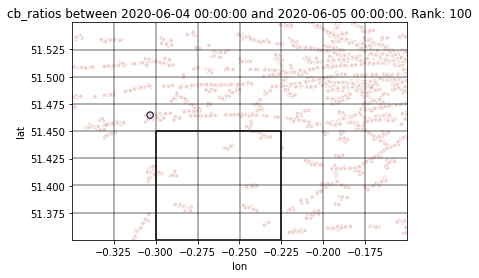

In [20]:
plot_region_by_rank(100, res_df, forecast_df, plot_type='cb_ratio', add_legend=False)